#  Search H R 1
Example to illustrate high resolution peak searching function (class TSpectrum).




**Author:**  Miroslav Morhac, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:37 AM.</small></i>

In [1]:
Double_t fPositionX[100];
Double_t fPositionY[100];
Int_t fNPeaks = 0;
Int_t i,nfound,bin;
const Int_t nbins = 1024;
Double_t xmin     = 0;
Double_t xmax     = nbins;
Double_t a;
Double_t source[nbins], dest[nbins];
gROOT->ForceStyle();

TString dir  = gROOT->GetTutorialDir();
TString file = dir+"/spectrum/TSpectrum.root";
TFile *f     = new TFile(file.Data());
TH1F *h = (TH1F*) f->Get("back2");
h->SetTitle("High resolution peak searching, number of iterations = 3");
h->GetXaxis()->SetRange(1,nbins);
TH1F *d = new TH1F("d","",nbins,xmin,xmax);
h->Draw("L");

for (i = 0; i < nbins; i++) source[i]=h->GetBinContent(i + 1);

h->Draw("L");

TSpectrum *s = new TSpectrum();

nfound = s->SearchHighRes(source, dest, nbins, 8, 2, kTRUE, 3, kTRUE, 3);
Double_t *xpeaks = s->GetPositionX();
for (i = 0; i < nfound; i++) {
   a=xpeaks[i];
   bin = 1 + Int_t(a + 0.5);
   fPositionX[i] = h->GetBinCenter(bin);
   fPositionY[i] = h->GetBinContent(bin);
}

TPolyMarker * pm = (TPolyMarker*)h->GetListOfFunctions()->FindObject("TPolyMarker");
if (pm) {
   h->GetListOfFunctions()->Remove(pm);
   delete pm;
}
pm = new TPolyMarker(nfound, fPositionX, fPositionY);
h->GetListOfFunctions()->Add(pm);
pm->SetMarkerStyle(23);
pm->SetMarkerColor(kRed);
pm->SetMarkerSize(1.3);

for (i = 0; i < nbins; i++) d->SetBinContent(i + 1,dest[i]);
d->SetLineColor(kRed);
d->Draw("SAME");

printf("Found %d candidate peaks\n",nfound);
for( i=0;i<nfound;i++) printf("posx= %f, posy= %f\n",fPositionX[i], fPositionY[i]);

Found 11 candidate peaks
posx= 351.500000, posy= 5492.546875
posx= 289.500000, posy= 4819.614258
posx= 645.500000, posy= 5924.250000
posx= 445.500000, posy= 5238.460938
posx= 540.500000, posy= 5092.015625
posx= 600.500000, posy= 5099.656250
posx= 873.500000, posy= 4961.125000
posx= 927.500000, posy= 4711.515625
posx= 705.500000, posy= 4609.722656
posx= 987.500000, posy= 4136.967773
posx= 777.500000, posy= 4112.816406


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

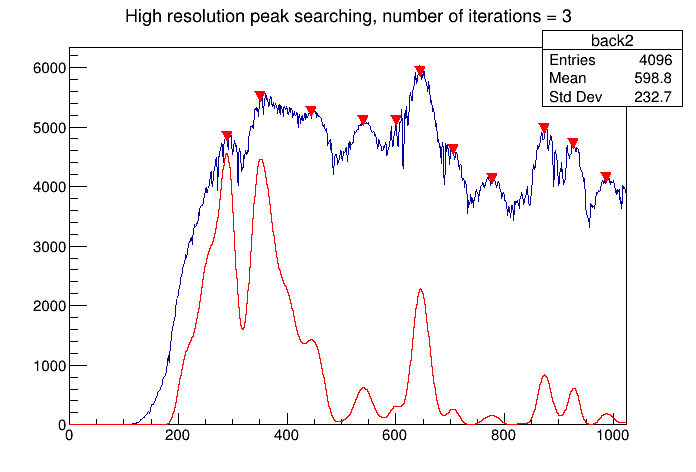

In [2]:
gROOT->GetListOfCanvases()->Draw()